______________________________________________________________________________________________________
total: 1309 train_df: 1034 test: 275
______________________________________________________________________________________________________


Using TensorFlow backend.


______________________________________________________________________________________________________
Train on 930 samples, validate on 104 samples
Epoch 1/30
0s - loss: 0.6899 - acc: 0.5774 - val_loss: 0.6702 - val_acc: 0.7885
Epoch 2/30
0s - loss: 0.6666 - acc: 0.6022 - val_loss: 0.5886 - val_acc: 0.7885
Epoch 3/30
0s - loss: 0.6066 - acc: 0.6710 - val_loss: 0.4928 - val_acc: 0.8077
Epoch 4/30
0s - loss: 0.5409 - acc: 0.7667 - val_loss: 0.4628 - val_acc: 0.7596
Epoch 5/30
0s - loss: 0.5034 - acc: 0.7634 - val_loss: 0.4540 - val_acc: 0.7885
Epoch 6/30
0s - loss: 0.4894 - acc: 0.7634 - val_loss: 0.4402 - val_acc: 0.7788
Epoch 7/30
0s - loss: 0.4814 - acc: 0.7602 - val_loss: 0.4433 - val_acc: 0.7885
Epoch 8/30
0s - loss: 0.4786 - acc: 0.7559 - val_loss: 0.4361 - val_acc: 0.7981
Epoch 9/30
0s - loss: 0.4728 - acc: 0.7645 - val_loss: 0.4284 - val_acc: 0.7788
Epoch 10/30
0s - loss: 0.4696 - acc: 0.7753 - val_loss: 0.4267 - val_acc: 0.8077
Epoch 11/30
0s - loss: 0.4657 - acc: 0.7656 - val_

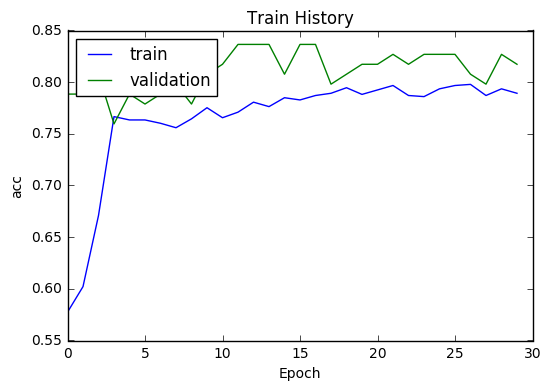

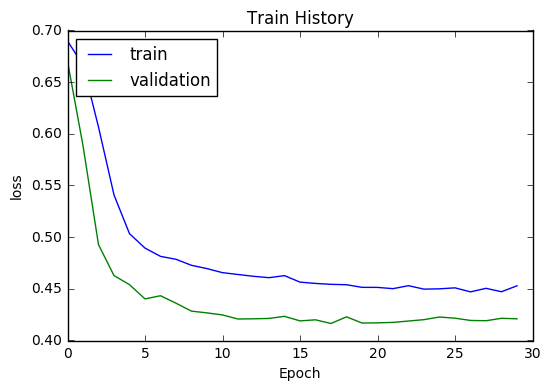

 32/275 [==>...........................] - ETA: 0s
the scores : 0.807272727706


In [3]:
import os
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

#download
import urllib.request
url = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath = "titanic3.xls"

if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath)
    print('downloaded:', result)

def PreprocessData(raw_df):
    df = raw_df.drop(['name'],axis=1)
    age_mean   = df['age'].mean()
    df['age']  = df['age'].fillna(age_mean)
    fare_mean  = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)    
    df['sex']  = df['sex'].map({'female':0, 'male':1}).astype(int)
    x_OneHot_df =pd.get_dummies(data = df,columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label
    

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #image of size in figure
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx])
        title ="label="+str(label_dict[labels[i][0]])
        if len(prediction)>0 : 
            title+=",predict"+str(label_dict[prediction[i]]) 
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])#not display scale on figure
        idx+=1
    plt.show()

def show_train_history(train_history,train,Validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[Validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
def show_Predicted_Probability(y,prediction,x_img,predicted_probability,i):
    print('label : ', label_dict[y[i][0]],
          'predict:', label_dict[prediction[i]] )
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_image_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(predicted_probability[i][j]))    
    
#______________________________________________________________________________________________________


print('______________________________________________________________________________________________________')    
    
#loading data    
all_df = pd.read_excel(filepath)#all_df[:2] #check_out    
cols   = ['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df = all_df[cols]#change col data   
    
#spil out
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df  = all_df[~msk] #rest of part
print('total:',len(all_df),'train_df:',len(train_df),'test:',len(test_df))

#pre-process
train_feature, train_label = PreprocessData(train_df)
test_feature,  test_label  = PreprocessData(test_df)

print('______________________________________________________________________________________________________')  
#build model
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(units=40,input_dim=9,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

print('______________________________________________________________________________________________________')  
#start tranning
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x=train_feature, y=train_label, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

print('show_trainning result....')
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(x=test_feature,y=test_label)
print('\nthe scores :', scores[1])

In [4]:
#
Jack = pd.Series([0,'Jack',3,'male'  ,23,1,0,5.000,'S'])
Rose = pd.Series([1,'Rose',1,'female',20,1,0,100.000,'S'])
JR_df = pd.DataFrame([list(Jack),list(Rose)], columns=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])
all_df = pd.concat([all_df,JR_df])

all_features, label = PreprocessData(all_df)
all_Probability = model.predict(all_features)
#all_Probability[:10]

pd = all_df
pd.insert(len(all_df.columns),'probability',all_Probability)

#Jack & Rose
print('Jack & Rose')
pd[-2:]



Jack & Rose


,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.148154
1,1,Rose,1,female,20.0,1,0,100.0,S,0.971477


In [5]:
#survived
print('survived')
pd[(pd['survived']==0) & (pd['probability']>0.9)]


survived


,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.975637
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.973526
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.980385
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.977631
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.962056


In [6]:
#Allision
print('Allision')
pd[:5]


Allision


,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.978232
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.605884
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.975637
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.389257
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.973526
